# 2D Ising Model simulation

In [1]:
import IsingModel.ising2D as ising
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from numba import jit, prange

Set parameters of the MCMC simulation

In [9]:
nMCMC = 1000; Length, Width = 25, 25
Temperature = np.linspace(1.5, 3.5, 100)
Energy = np.zeros(Temperature.shape)
Magnetization = np.zeros(Temperature.shape)
SpecificHeat = np.zeros(Temperature.shape)
Susceptibility = np.zeros(Temperature.shape)
n1 = 1./(nMCMC*Length*Width)
n2 = 1./(nMCMC*nMCMC*Length*Width)

In [10]:
@jit(forceobj=True)
def mcmc(config, nmcmc, invkT, J):
    E, M, E2, M2 = 0., 0., 0., 0.
    for nmc in prange(nmcmc):
        update = ising.MCMCstep(config,invkT,J)
        Ecurrent = ising.calculateEnergy(update)
        Mcurrent = ising.calculateMagnetization(update)
        E += Ecurrent
        M += Mcurrent
        E2 += Ecurrent**2
        M2 += Mcurrent**2
    return E, M, E2, M2


for itemp in tqdm(range(len(Temperature))):
    configuration = ising.InitializeRandomState((Length,Width))
    
    states = ising.simulate(
        configuration = configuration, 
        initial_invkT = 1./Temperature[itemp], 
        J = 1., evolutionSteps = nMCMC,
    )
    
    E, M, E2, M2 = mcmc(states[-1], nMCMC, 1./Temperature[itemp], 1.)
    
    Energy[itemp] = n1 * E
    Magnetization[itemp] = n1 * M
    SpecificHeat[itemp] = (n1*E2 - n2*E*E)*Temperature[itemp]*Temperature[itemp]
    Susceptibility[itemp] = (n1*M2 - n2*M*M)*Temperature[itemp]

100%|██████████| 100/100 [04:57<00:00,  2.97s/it]


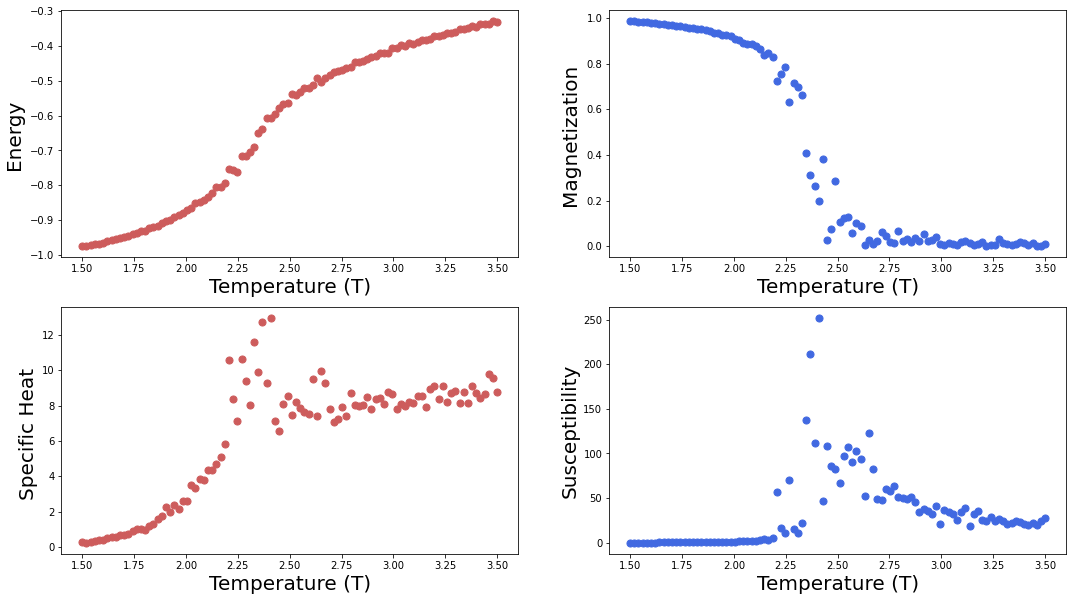

In [11]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(Temperature, Energy, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(Temperature, abs(Magnetization), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(Temperature, SpecificHeat, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(Temperature, Susceptibility, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [18]:
states = ising.simulate(
        configuration = ising.InitializeRandomState((Length,Width)), 
        initial_invkT = 1./2.25, 
        J = 1., evolutionSteps = 10000,
    )

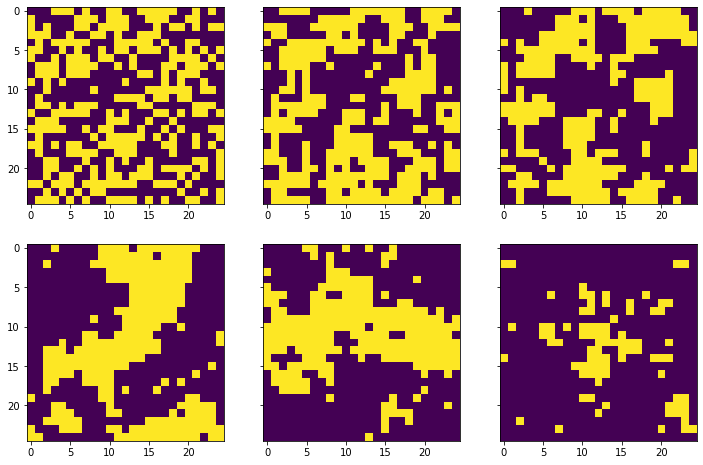

In [19]:
fig, axarr = plt.subplots(2, 3, sharey=True)
fig.set_size_inches(12, 8)
axarr[0,0].imshow(states[0])
axarr[0,1].imshow(states[1])
axarr[0,2].imshow(states[4])
axarr[1,0].imshow(states[32])
axarr[1,1].imshow(states[100])
axarr[1,2].imshow(states[1000])
plt.show()